In [466]:
##Problem Statement
#An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

#The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

#Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

In [2]:
import warnings
warnings.filterwarnings('ignore')#

In [467]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [468]:
# Reding the csv file
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [469]:
# shape of the data 
lead_data.shape

(9240, 37)

In [470]:
# checking non null count and datatype of the variables
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [471]:
# Describing data
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [472]:
# Data Cleaning
# Converting 'Select' values to NaN.
lead_data = lead_data.replace('Select', np.nan)

In [473]:
# checking the columns for null values
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [474]:
# Finding the null percentages across columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [475]:
# dropping the columns with missing values greater than or equal to 40% .
lead_data=lead_data.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [476]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

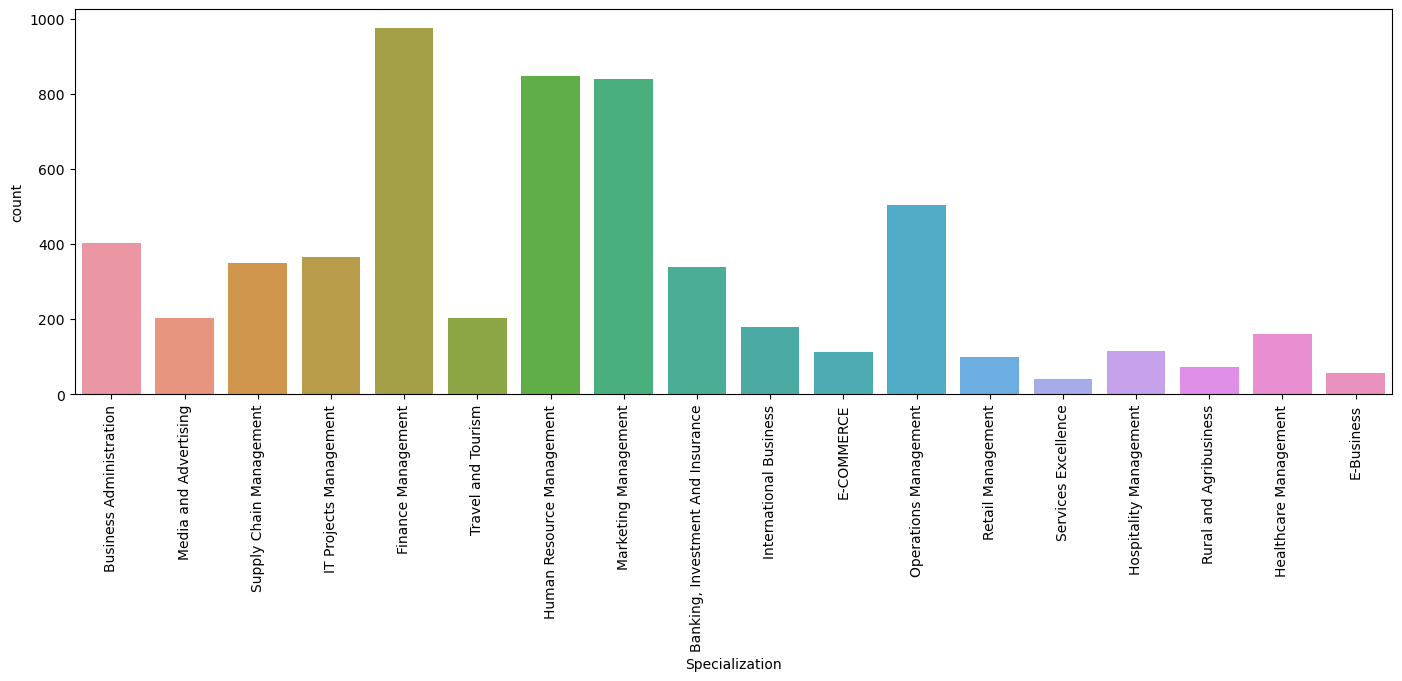

In [477]:
plt.figure(figsize=(17,5))
sns.countplot(lead_data['Specialization'])
plt.xticks(rotation=90)

In [478]:
# Creating a separate category called 'Others' for this 
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

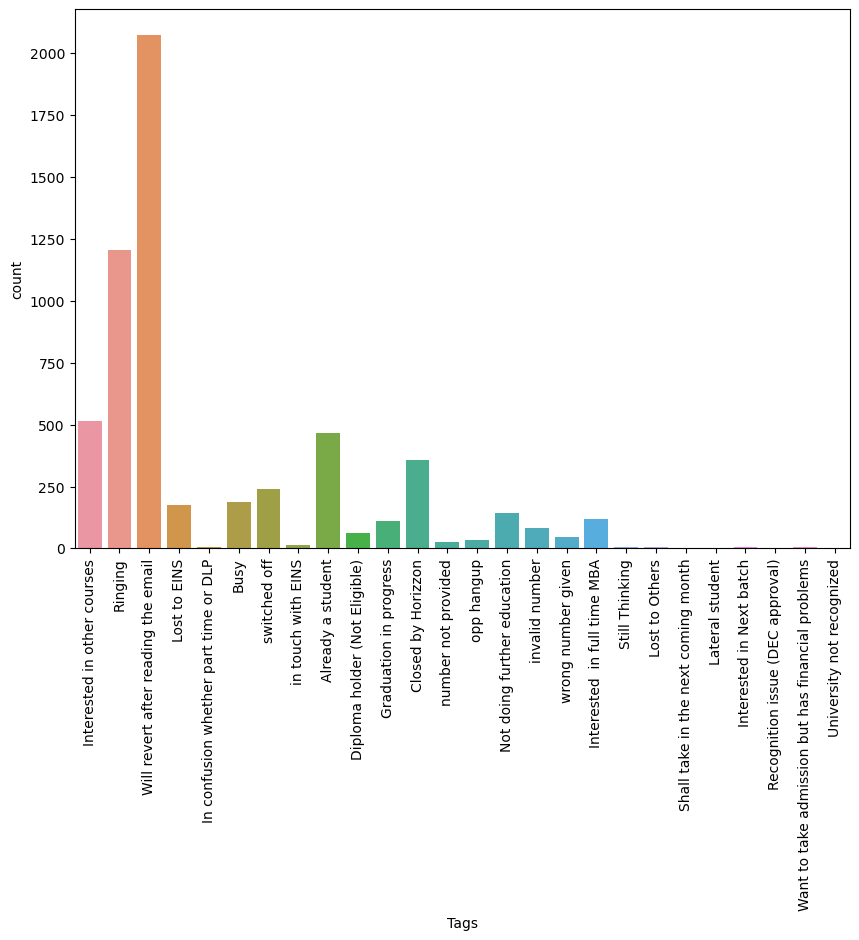

In [479]:
# Visualizing Tags column
plt.figure(figsize=(10,7))
sns.countplot(lead_data['Tags'])
plt.xticks(rotation=90)

In [480]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
lead_data['Tags']=lead_data['Tags'].replace(np.nan,'Will revert after reading the email')

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

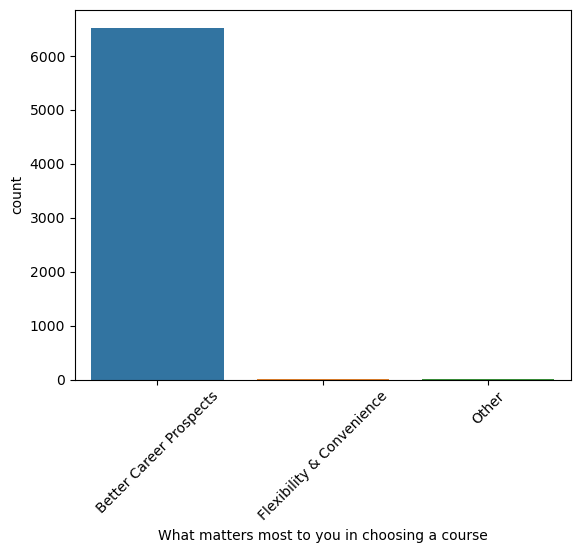

In [481]:
# Visualizing this column
sns.countplot(lead_data['What matters most to you in choosing a course'])
plt.xticks(rotation=45)

In [482]:
# Finding the percentage of the different categories of this column:
round(lead_data['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [483]:
# Dropping this column 
lead_data=lead_data.drop('What matters most to you in choosing a course',axis=1)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

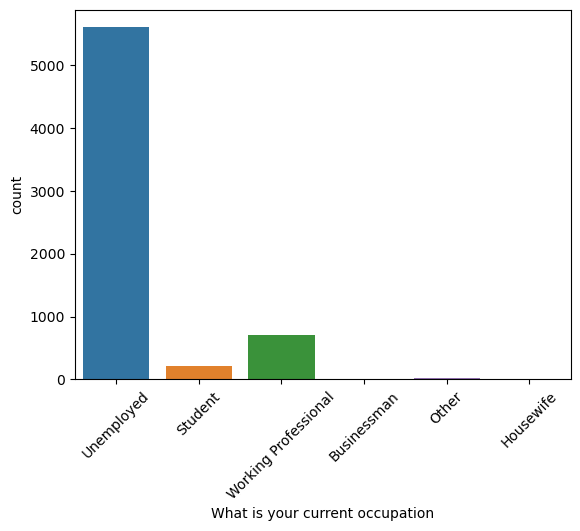

In [484]:
sns.countplot(lead_data['What is your current occupation'])
plt.xticks(rotation=45)

In [485]:
# Finding the percentage of the different categories of this column:
round(lead_data['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

In [486]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.nan,'Unemployed')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

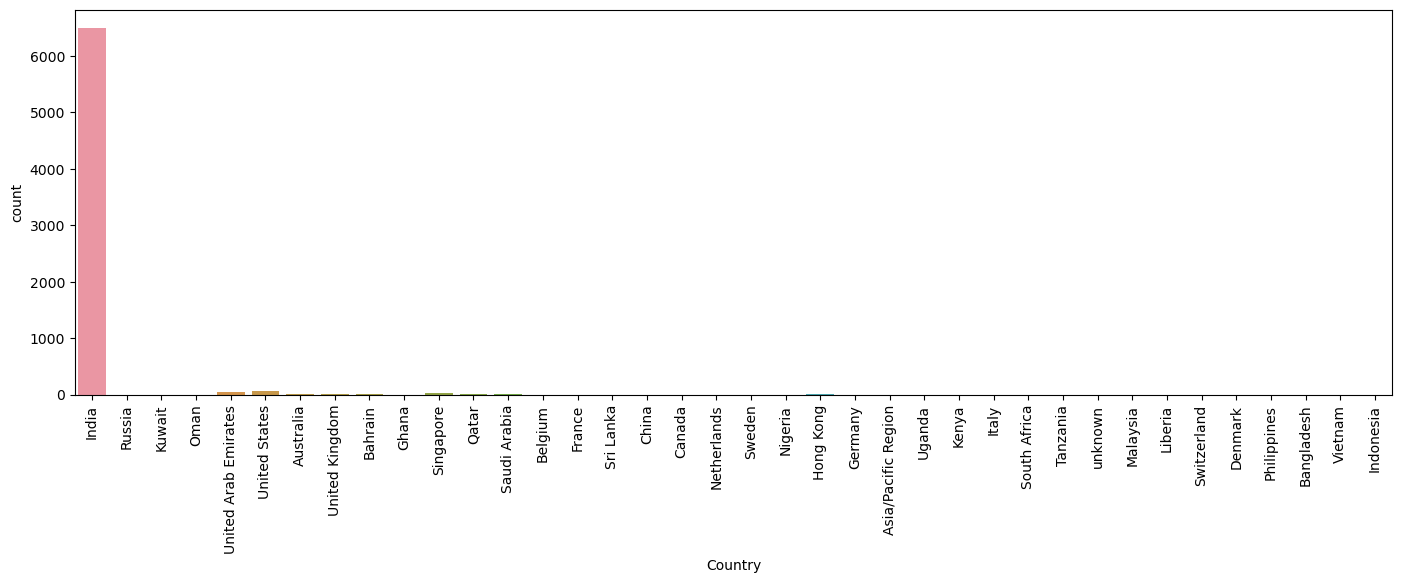

In [487]:
plt.figure(figsize=(17,5))
sns.countplot(lead_data['Country'])
plt.xticks(rotation=90)

In [488]:
# Imputing the missing data in the 'Country' column with 'India'
lead_data['Country']=lead_data['Country'].replace(np.nan,'India')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

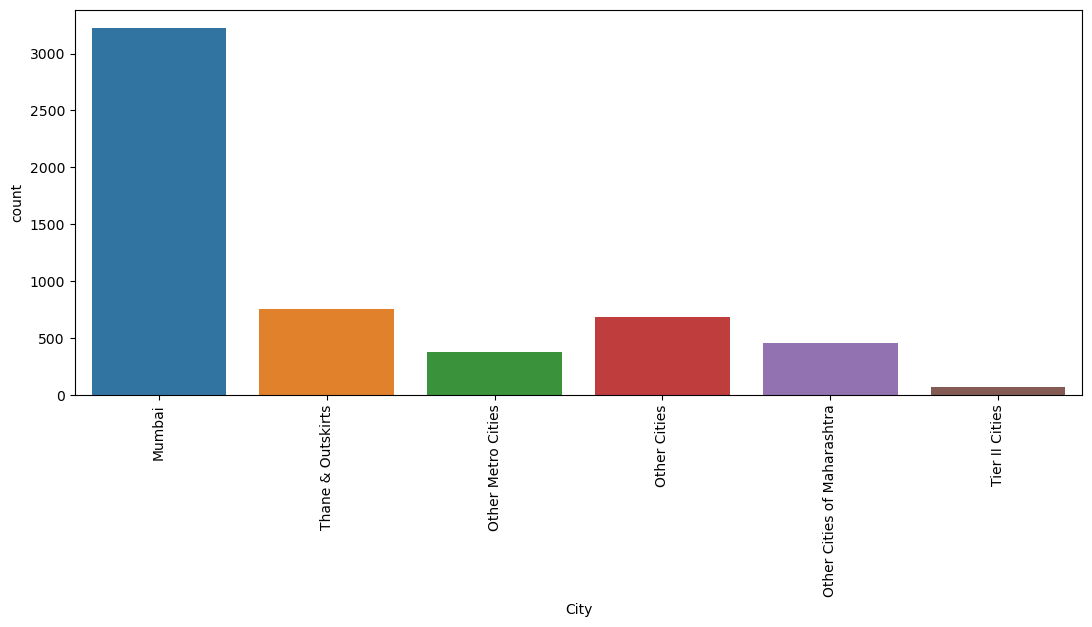

In [489]:
plt.figure(figsize=(13,5))
sns.countplot(lead_data['City'])
plt.xticks(rotation=90)

In [490]:
# Finding the percentage of the different categories of this column:
round(lead_data['City'].value_counts(normalize=True),2)*100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

In [491]:
# Imputing the missing data in the 'City' column with 'Mumbai'
lead_data['City']=lead_data['City'].replace(np.nan,'Mumbai')

In [492]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [493]:
# Dropping the rows with null values
lead_data.dropna(inplace = True)

In [494]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [495]:
# Percentage of rows retained 
(len(lead_data.index)/9240)*100

98.2034632034632

In [496]:
#Exploratory Data Anaysis¶
lead_data[lead_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [497]:
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

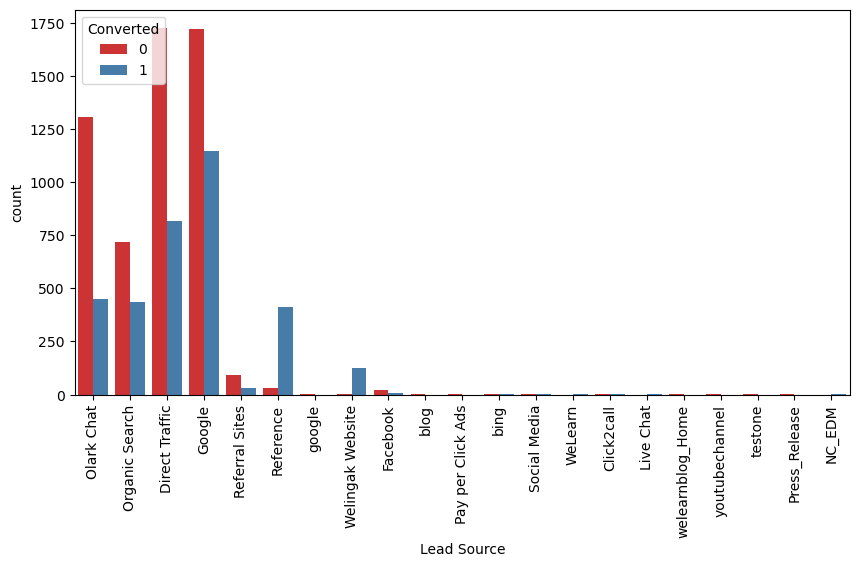

In [498]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data, palette='Set1')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

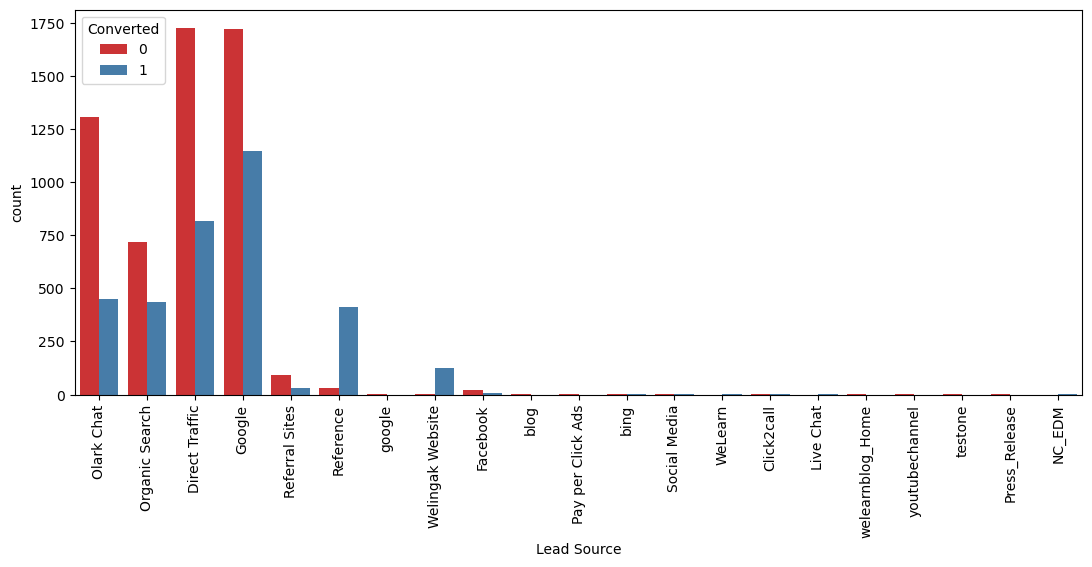

In [499]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data, palette='Set1')
plt.xticks(rotation = 90)

In [500]:
# Need to replace 'google' with 'Google'
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')

In [501]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

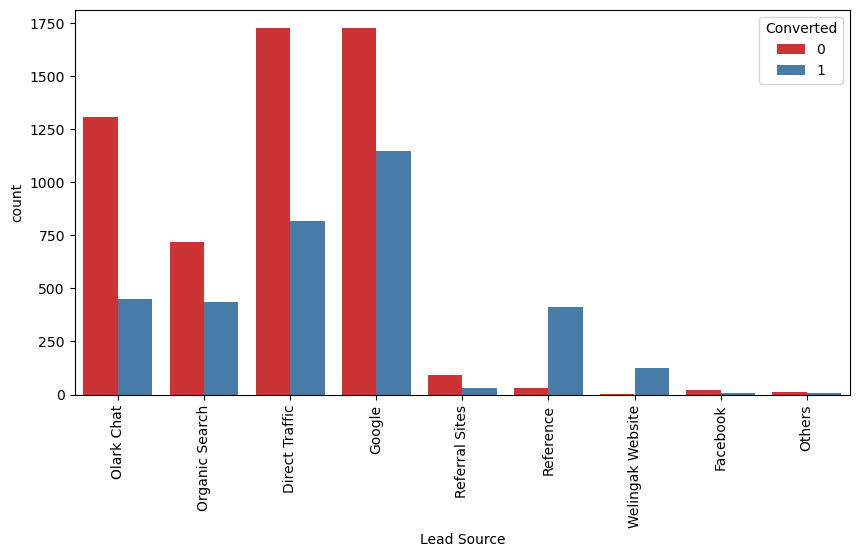

In [502]:
# Visualizing again
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

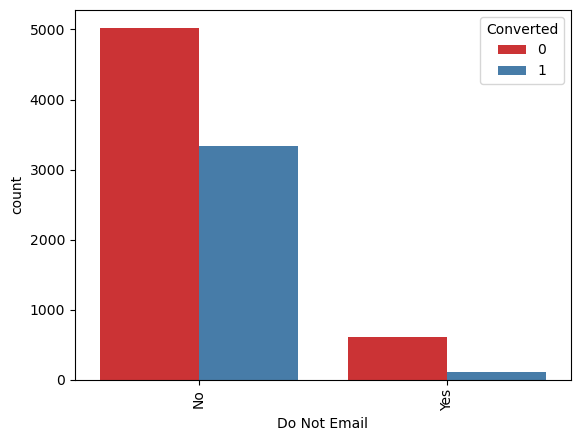

In [503]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

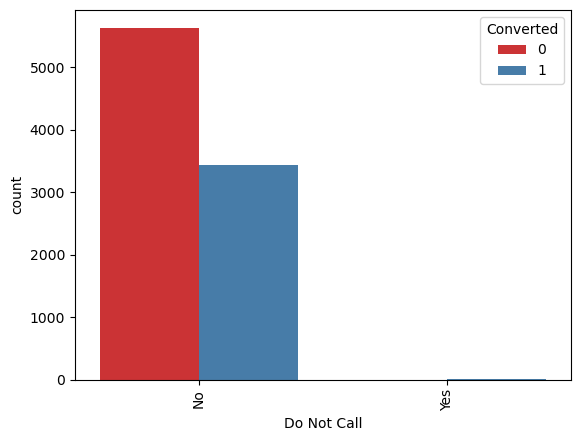

In [504]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [505]:
lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

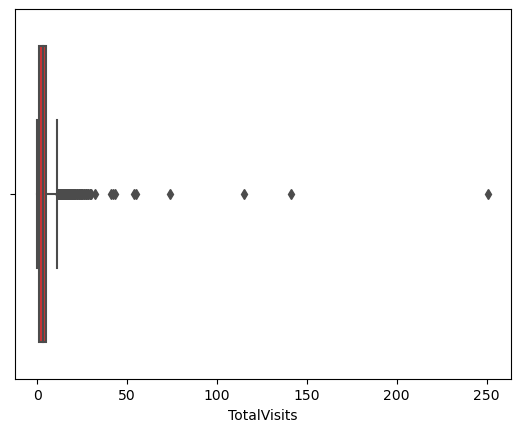

In [506]:
sns.boxplot(lead_data['TotalVisits'],orient='vert',palette='Set1')

In [507]:
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='TotalVisits'>

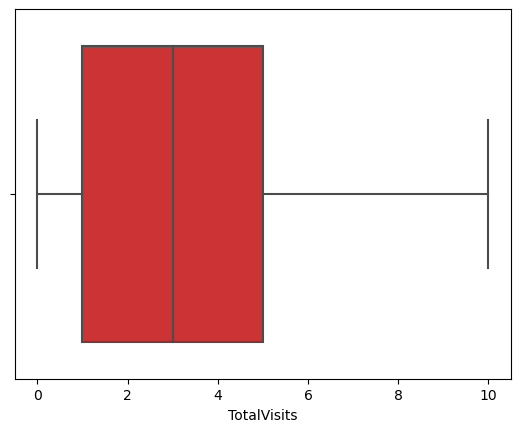

In [508]:
# Visualizing again
sns.boxplot(lead_data['TotalVisits'],orient='vert',palette='Set1')

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

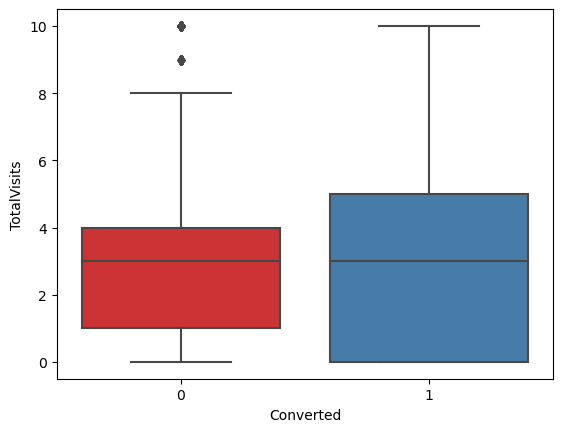

In [509]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data,palette='Set1')

In [510]:
lead_data['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Total Time Spent on Website'>

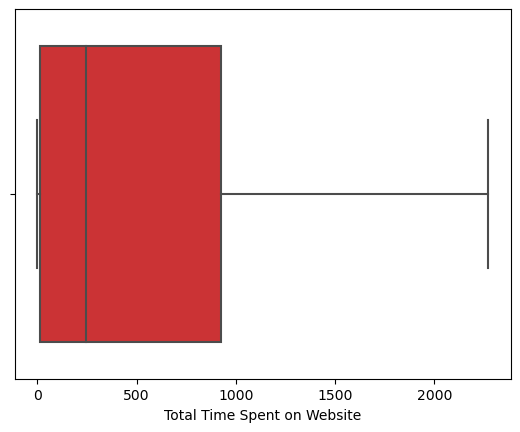

In [511]:
sns.boxplot(lead_data['Total Time Spent on Website'],orient='vert',palette='Set1')

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

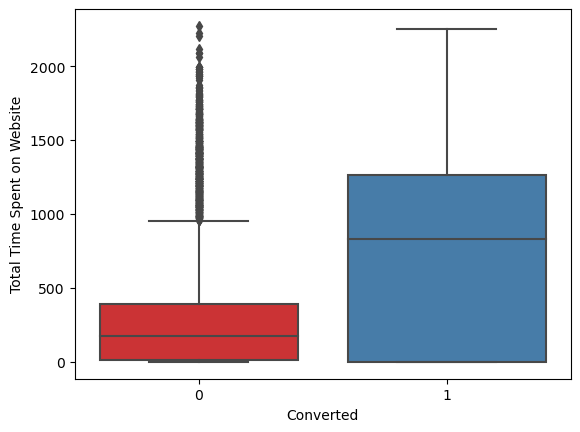

In [512]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data,palette='Set1')

In [513]:
lead_data['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Page Views Per Visit'>

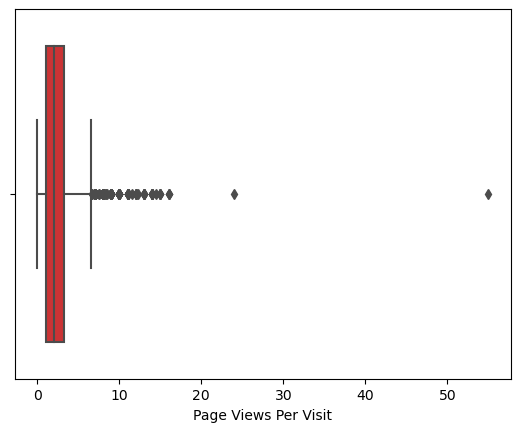

In [514]:
sns.boxplot(lead_data['Page Views Per Visit'],orient='vert',palette='Set1')

In [515]:
percentiles = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Page Views Per Visit'>

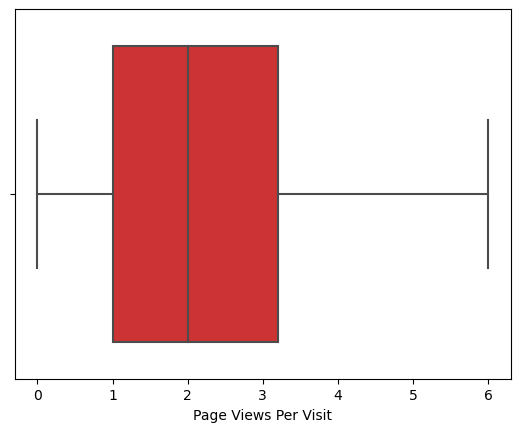

In [516]:
# Visualizing again
sns.boxplot(lead_data['Page Views Per Visit'],palette='Set1',orient='vert')

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

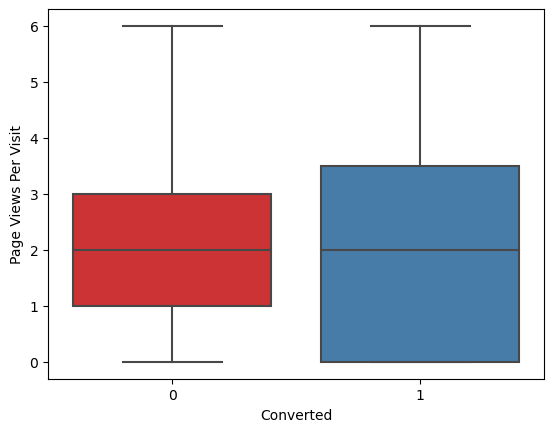

In [517]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lead_data,palette='Set1')

In [518]:
lead_data['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

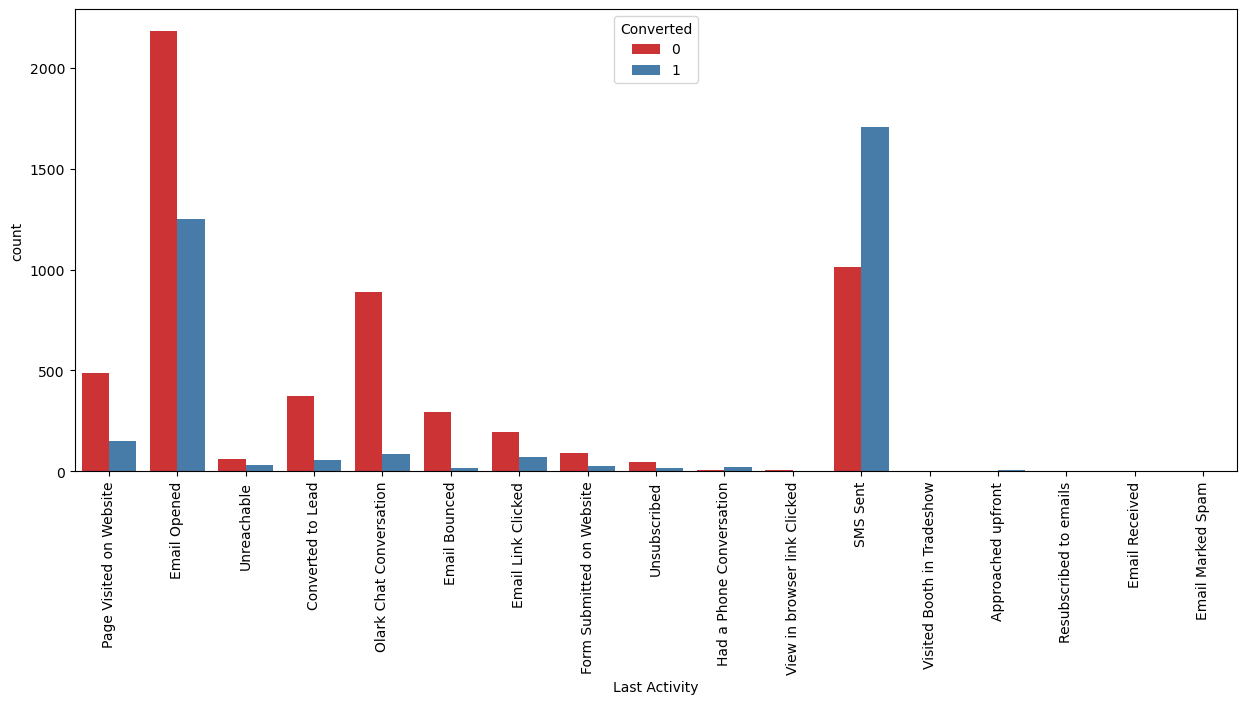

In [519]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [520]:
# We can club the last activities to "Other_Activity" which are having less data.
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

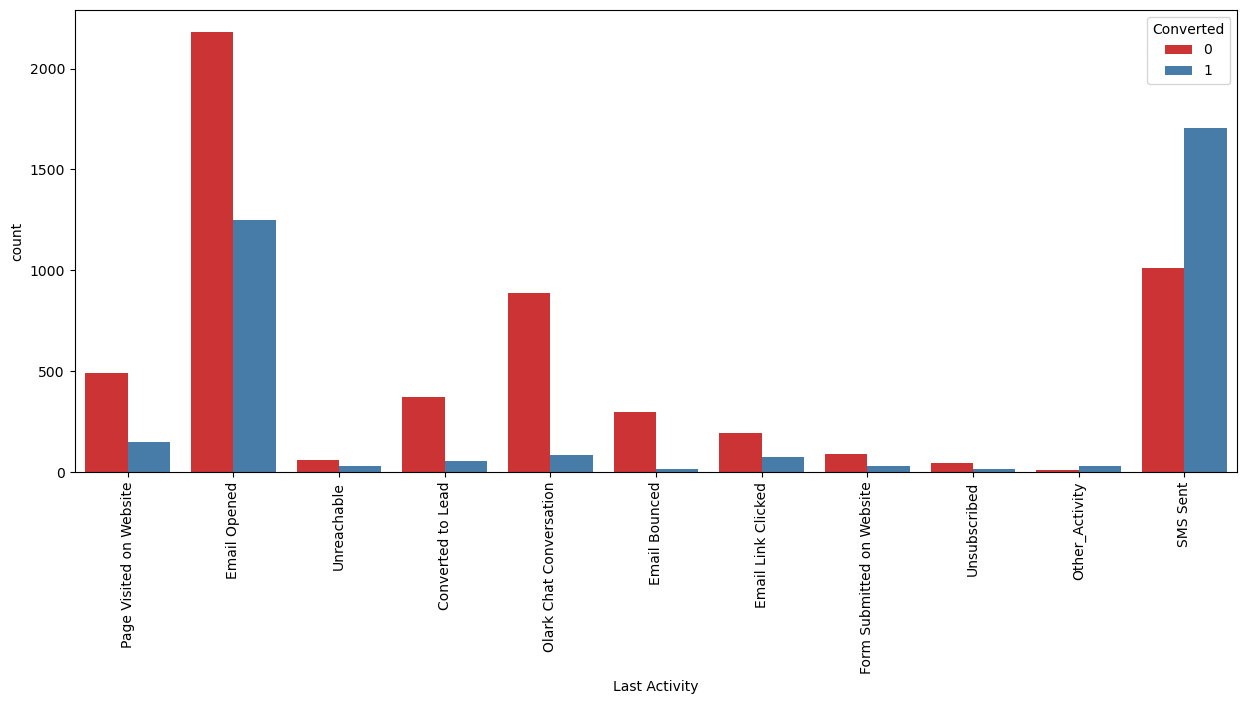

In [521]:
# Visualizing again
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

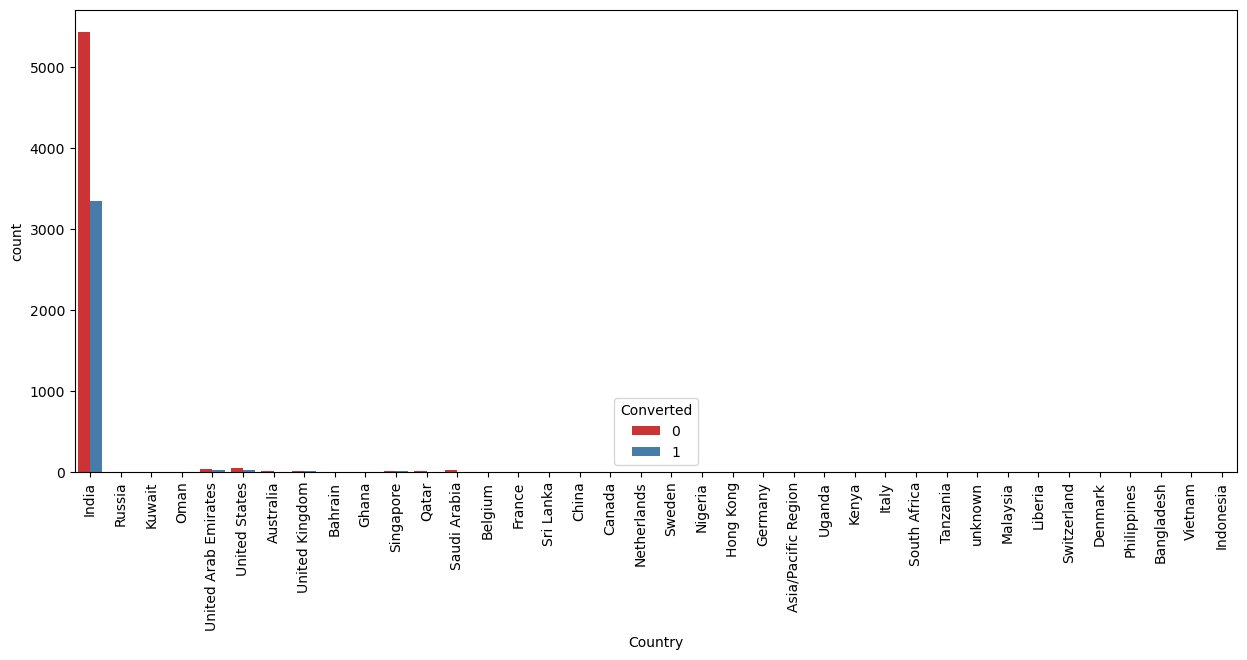

In [522]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

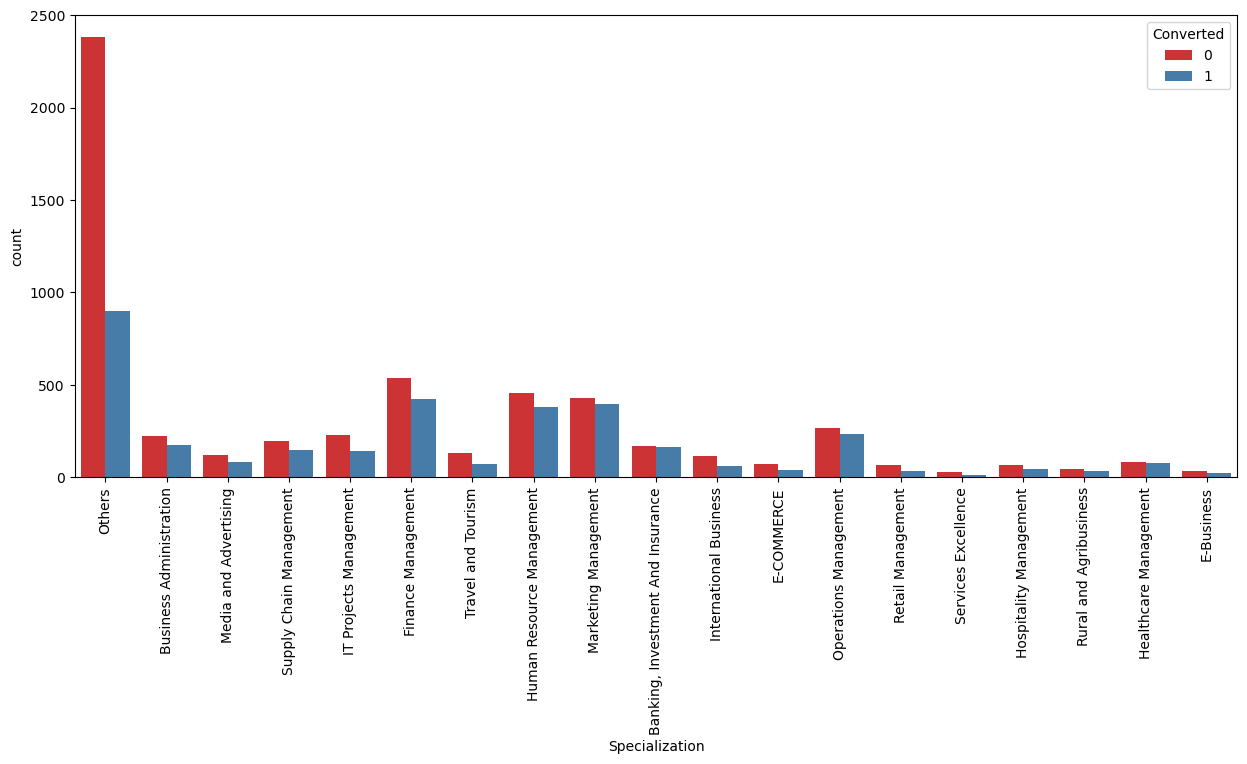

In [523]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

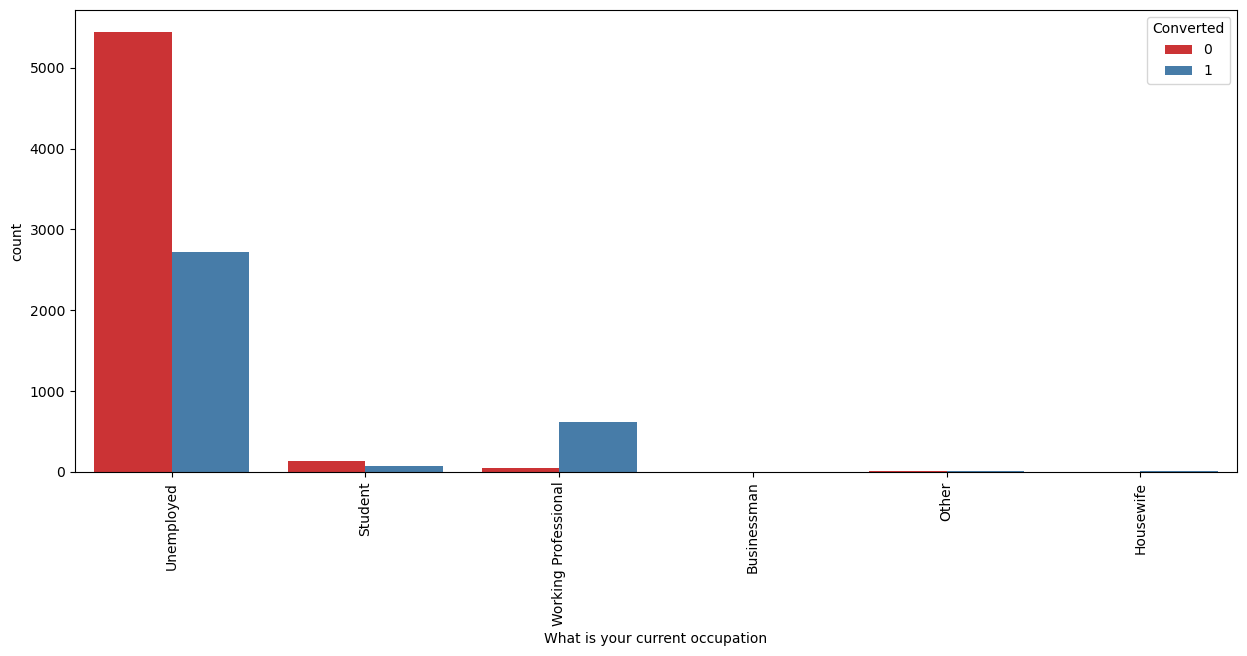

In [524]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

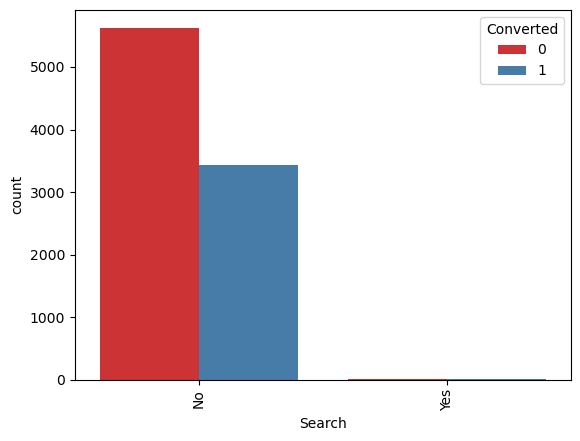

In [525]:
sns.countplot(x = "Search", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0]), [Text(0, 0, 'No')])

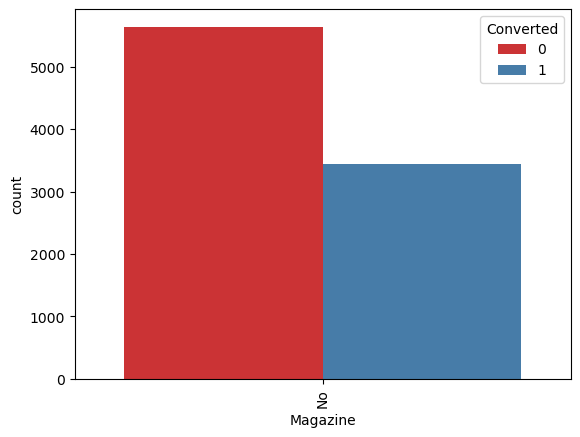

In [526]:
sns.countplot(x = "Magazine", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

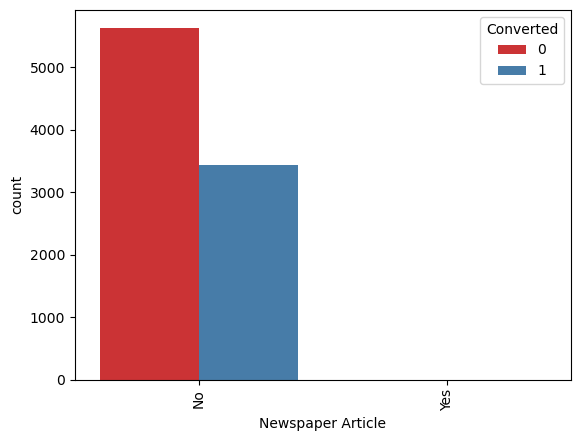

In [527]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

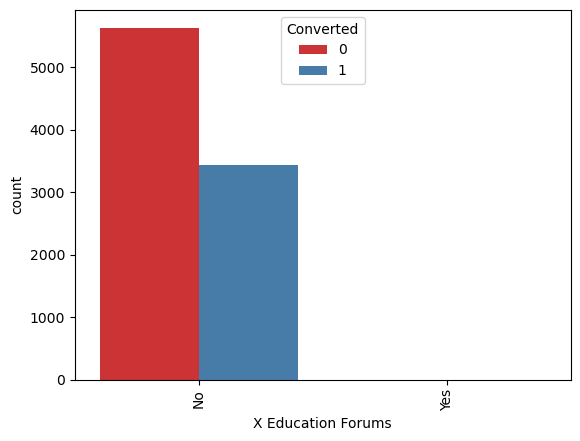

In [528]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

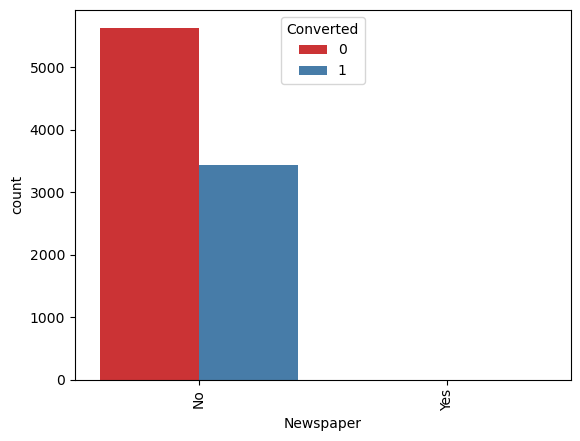

In [529]:
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

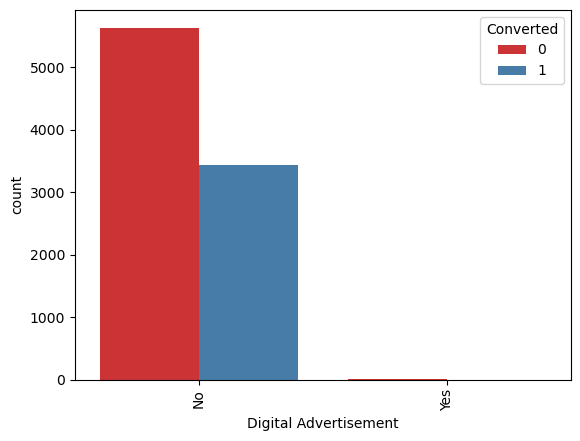

In [530]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

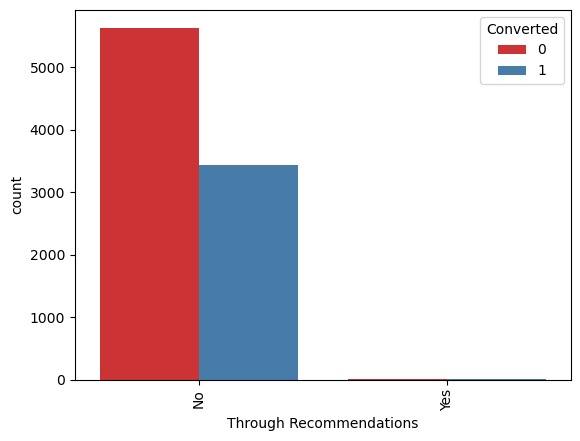

In [531]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0]), [Text(0, 0, 'No')])

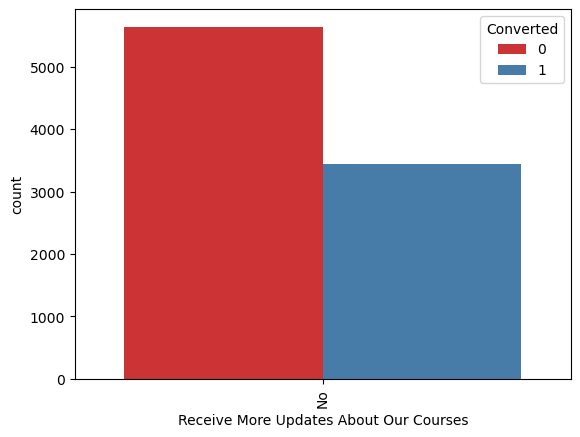

In [532]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

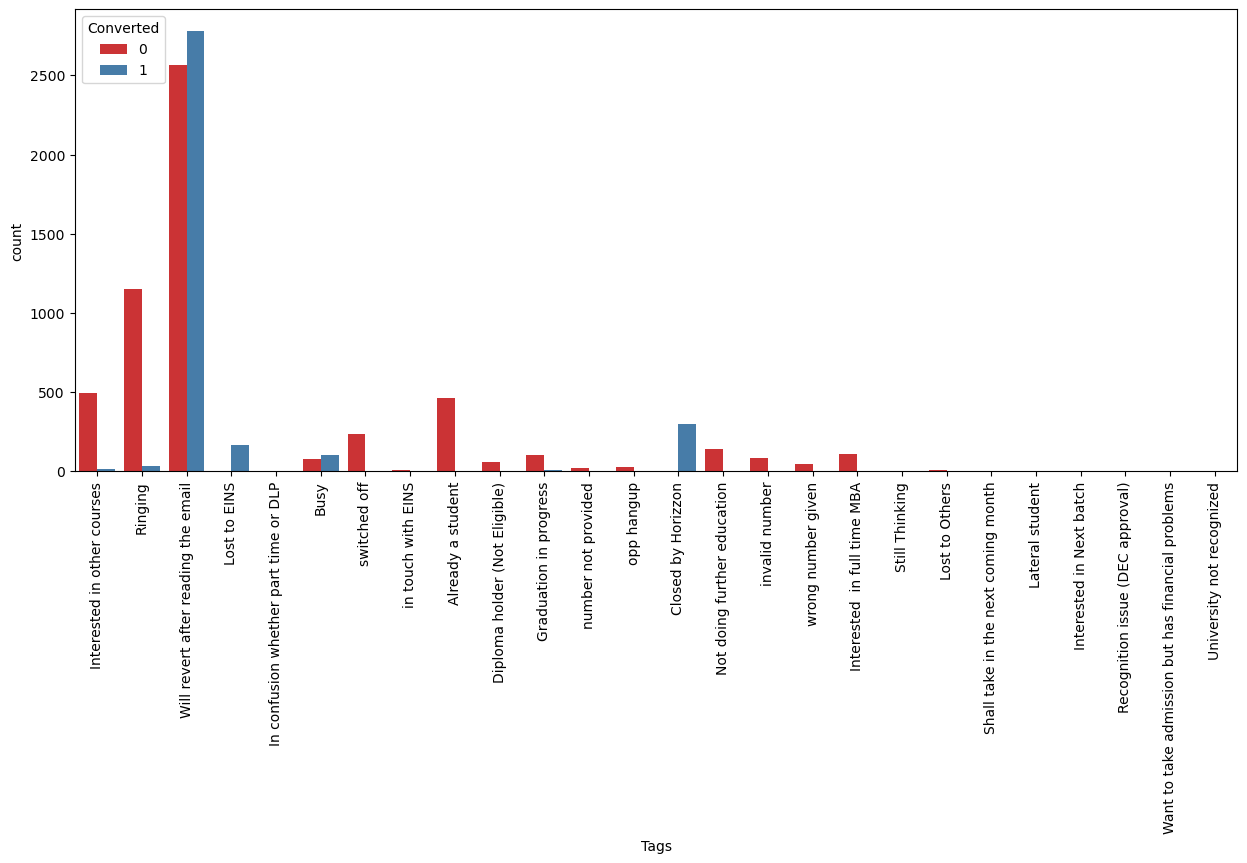

In [533]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0]), [Text(0, 0, 'No')])

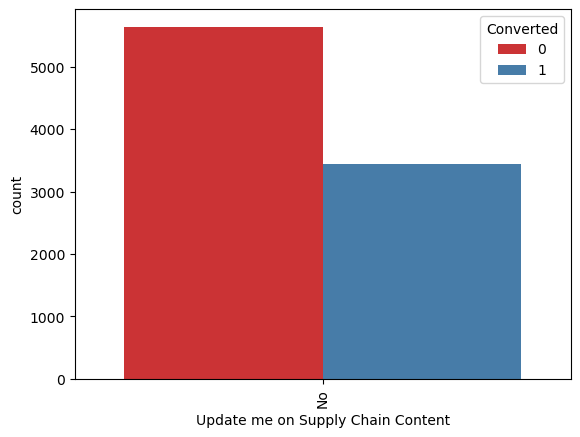

In [534]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0]), [Text(0, 0, 'No')])

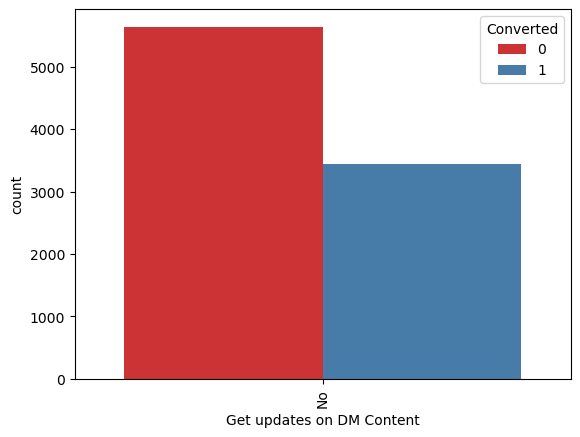

In [535]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

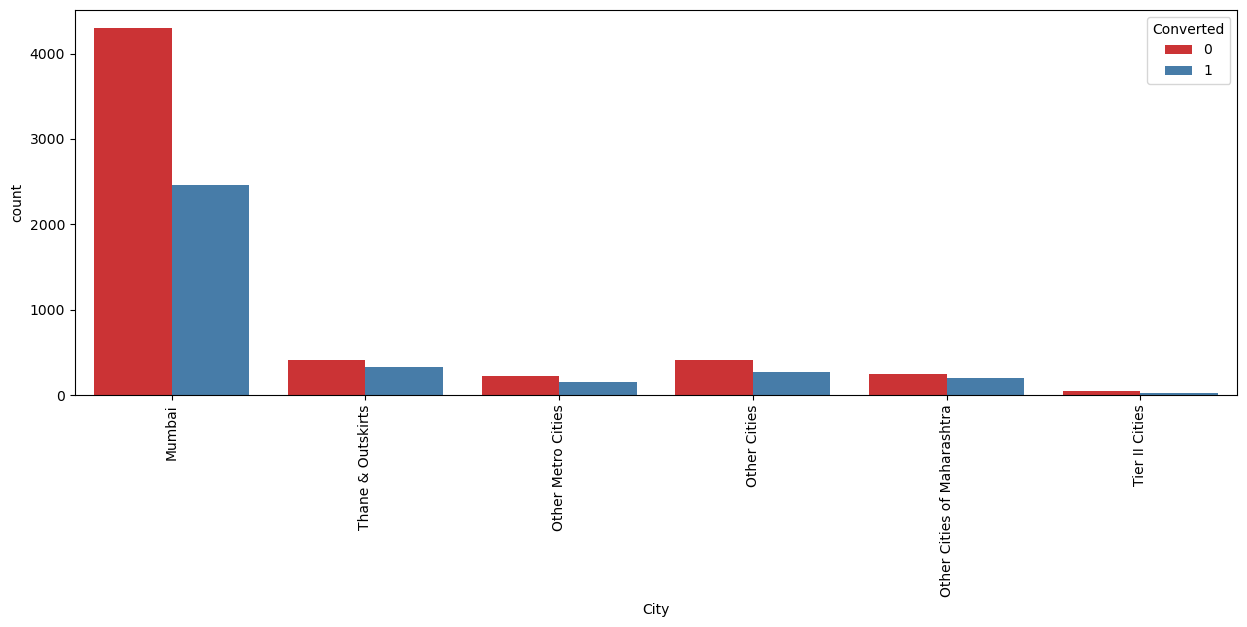

In [536]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0]), [Text(0, 0, 'No')])

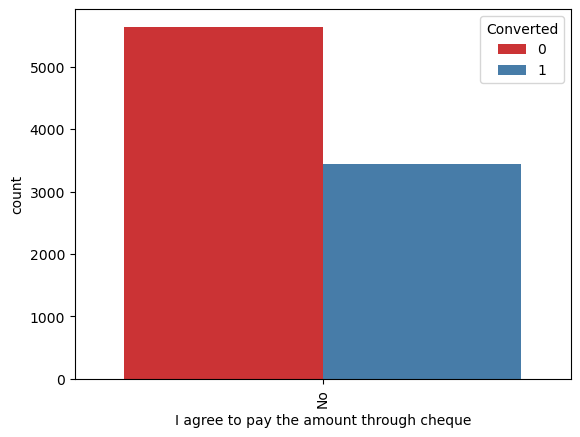

In [537]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

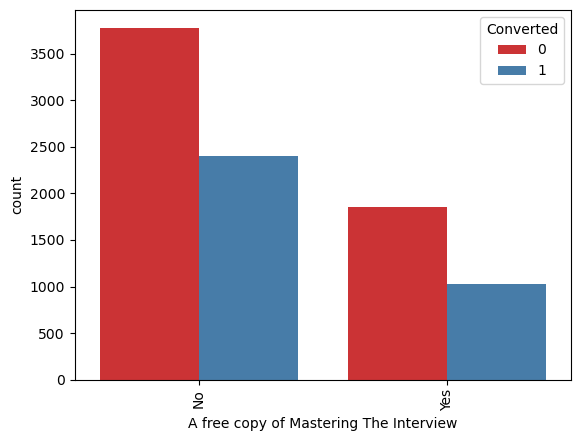

In [538]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

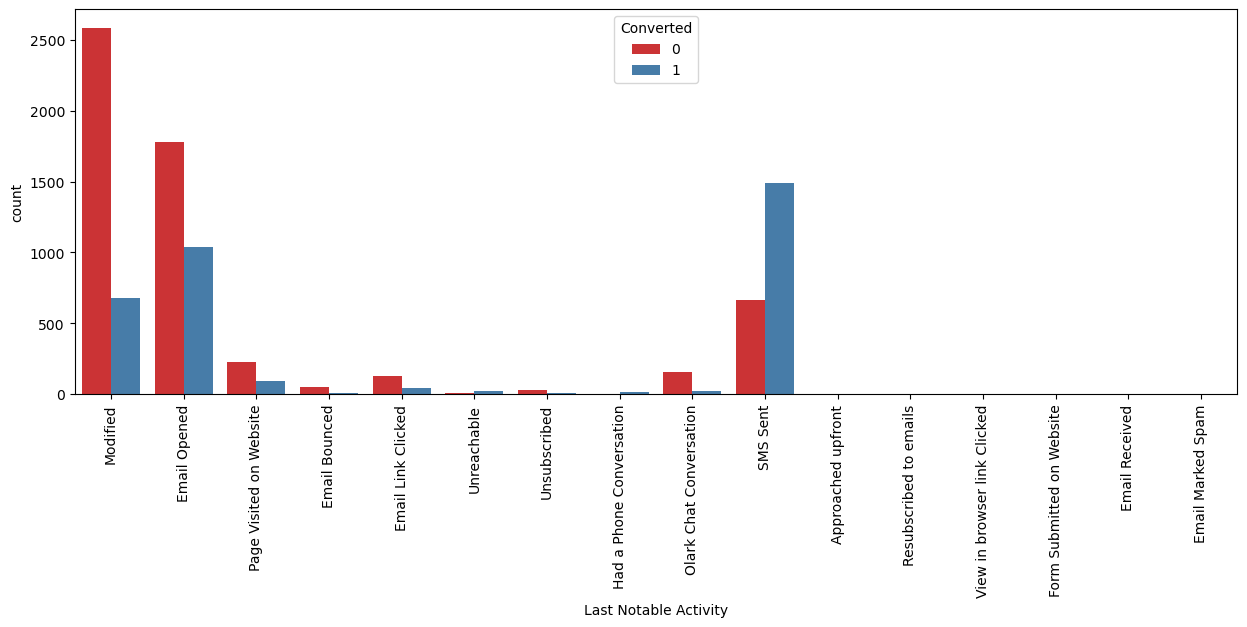

In [539]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [540]:
lead_data = lead_data.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [541]:
lead_data.shape

(9074, 14)

In [542]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

In [543]:
#Converting binary variable
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_data[vars] = lead_data[vars].apply(binary_map)

In [544]:
#Creating Dummy variables for the categorical features:
dummy_data = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [545]:
# Concatenating the dummy_data to the lead_data dataframe
lead_data = pd.concat([lead_data, dummy_data], axis=1)
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [546]:
#Dropping the columns for which dummies were created


lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [547]:
lead_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [548]:
#Splitting the data
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [549]:
# Putting target variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [550]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [551]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [552]:
# Checking the Lead Conversion rate
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

In [553]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, step = 20)            # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [554]:
rfe.support_

array([ True,  True, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True])

In [555]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Others', False, 2),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 2),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 3),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 2),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activit

In [556]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Hospitality Management',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_H

In [557]:
#Model Building
#Model-1
import statsmodels.api as sm


In [558]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.6
Date:                Sun, 18 Jun 2023   Deviance:                       5135.2
Time:                        06:52:36   Pearson chi2:                 6.39e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4081
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6007      1.661      0.964      0.335      -1.654       4.855
Do Not Email                                            -1.6564      0.210     -7.881      0.000      -2.068      -1.244
Do Not Call                                             21.6137    3.3e+04      0.001      0.999   -6.47e+04    6.47e+04
Total Time Spent on Website                              1.1101      0.041     26.997      0.000       1.030       1.191
Lead Origin_Landing Page Submission                     -1.1126      0.130     -8.531      0.000      -1.368      -0.857
Lead Origin_Lead Add Form                                1.4997      0.889      1.686      0.092      -0.244       3.243
Lead Origin_Lead Import                                  0.9100      0.477      1.909      0.056      -0.024       1.844
Lead Source_Olark Chat                                   1.1030      0.125      8.854      0.000       0.859       1.347
Lead Source_Reference                                    1.8289      0.914      2.001      0.045       0.038       3.620
Lead Source_Welingak Website                             4.4013      1.147      3.838      0.000       2.154       6.649
Last Activity_Email Link Clicked                         0.4575      0.396      1.156      0.248      -0.318       1.233
Last Activity_Email Opened                               0.6642      0.185      3.598      0.000       0.302       1.026
Last Activity_Olark Chat Conversation                   -0.6190      0.227     -2.733      0.006      -1.063      -0.175
Last Activity_Other_Activity                             2.1619      0.603      3.587      0.000       0.981       3.343
Last Activity_SMS Sent                                   1.1159      0.187      5.978      0.000       0.750       1.482
Last Activity_Unreachable                                0.2990      0.509      0.588      0.557      -0.698       1.296
Last Activity_Unsubscribed                               1.3943      1.125      1.240      0.215      -0.810       3.598
Specialization_Hospitality Management                   -0.4284      0.329     -1.303      0.193      -1.073       0.216
Specialization_Others                                   -1.1435      0.127     -9.022      0.000      -1.392      -0.895
What is your current occupation_Housewife               21.7279   1.53e+04      0.001      0.999   -2.99e+04       3e+04
What is your current occupation_Student                 -0.5905      0.687     -0.859      0.390      -1.938       0.757
What is your current occupation_Unemployed              -1.0375      0.649     -1.599      0.110      -2.309       0.234
What is your current occupation_Working Professional     1

In [559]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

In [560]:
#Model 2
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2569.5
Date:                Sun, 18 Jun 2023   Deviance:                       5139.0
Time:                        06:52:37   Pearson chi2:                 6.40e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4078
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.0893      1.642      1.272      0.203      -1.129       5.307
Do Not Email                                            -1.6601      0.210     -7.893      0.000      -2.072      -1.248
Do Not Call                                             20.6175      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1090      0.041     26.988      0.000       1.028       1.190
Lead Origin_Landing Page Submission                     -1.1060      0.130     -8.488      0.000      -1.361      -0.851
Lead Origin_Lead Add Form                                1.5026      0.889      1.690      0.091      -0.240       3.246
Lead Origin_Lead Import                                  0.9113      0.477      1.913      0.056      -0.023       1.845
Lead Source_Olark Chat                                   1.1031      0.125      8.854      0.000       0.859       1.347
Lead Source_Reference                                    1.8312      0.914      2.004      0.045       0.041       3.622
Lead Source_Welingak Website                             4.3991      1.147      3.836      0.000       2.151       6.647
Last Activity_Email Link Clicked                         0.4630      0.396      1.170      0.242      -0.313       1.239
Last Activity_Email Opened                               0.6694      0.185      3.625      0.000       0.307       1.031
Last Activity_Olark Chat Conversation                   -0.6158      0.227     -2.716      0.007      -1.060      -0.171
Last Activity_Other_Activity                             2.1672      0.603      3.596      0.000       0.986       3.348
Last Activity_SMS Sent                                   1.1207      0.187      6.002      0.000       0.755       1.487
Last Activity_Unreachable                                0.3037      0.509      0.597      0.550      -0.693       1.301
Last Activity_Unsubscribed                               1.4012      1.124      1.246      0.213      -0.803       3.605
Specialization_Hospitality Management                   -0.4286      0.329     -1.304      0.192      -1.073       0.216
Specialization_Others                                   -1.1398      0.127     -9.000      0.000      -1.388      -0.892
What is your current occupation_Student                 -1.0879      0.638     -1.706      0.088      -2.338       0.162
What is your current occupation_Unemployed              -1.5340      0.596     -2.573      0.010      -2.703      -0.365
What is your current occupation_Working Professional     1.0951      0.624      1.754      0.079      -0.128       2.319
City_Tier II Cities                                     -0

In [561]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

In [562]:
#Model-3
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2569.5
Date:                Sun, 18 Jun 2023   Deviance:                       5139.1
Time:                        06:52:37   Pearson chi2:                 6.40e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4078
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.3292      1.165      1.999      0.046       0.045       4.613
Do Not Email                                            -1.6609      0.210     -7.894      0.000      -2.073      -1.248
Do Not Call                                             20.6173      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1089      0.041     26.987      0.000       1.028       1.189
Lead Origin_Landing Page Submission                     -1.1062      0.130     -8.491      0.000      -1.362      -0.851
Lead Origin_Lead Add Form                                1.5025      0.889      1.690      0.091      -0.240       3.245
Lead Origin_Lead Import                                  0.9110      0.477      1.912      0.056      -0.023       1.845
Lead Source_Olark Chat                                   1.1026      0.125      8.852      0.000       0.858       1.347
Lead Source_Reference                                    1.8308      0.914      2.004      0.045       0.040       3.621
Lead Source_Welingak Website                             4.3992      1.147      3.836      0.000       2.152       6.647
Last Activity_Email Link Clicked                         0.4639      0.396      1.172      0.241      -0.312       1.240
Last Activity_Email Opened                               0.6702      0.185      3.631      0.000       0.308       1.032
Last Activity_Olark Chat Conversation                   -0.6148      0.227     -2.712      0.007      -1.059      -0.170
Last Activity_Other_Activity                             2.1863      0.595      3.673      0.000       1.020       3.353
Last Activity_SMS Sent                                   1.1216      0.187      6.008      0.000       0.756       1.487
Last Activity_Unreachable                                0.3045      0.509      0.599      0.549      -0.693       1.302
Last Activity_Unsubscribed                               1.4024      1.124      1.247      0.212      -0.801       3.606
Specialization_Hospitality Management                   -0.4286      0.329     -1.303      0.192      -1.073       0.216
Specialization_Others                                   -1.1401      0.127     -9.003      0.000      -1.388      -0.892
What is your current occupation_Student                 -1.0880      0.638     -1.706      0.088      -2.338       0.162
What is your current occupation_Unemployed              -1.5342      0.596     -2.573      0.010      -2.703      -0.365
What is your current occupation_Working Professional     1.0948      0.624      1.754      0.079      -0.129       2.318
City_Tier II Cities                                     -0

In [563]:
col1 = col1.drop('What is your current occupation_Student')

In [564]:
#Model-4
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.1
Date:                Sun, 18 Jun 2023   Deviance:                       5142.1
Time:                        06:52:38   Pearson chi2:                 6.40e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4075
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4073      1.029      1.368      0.171      -0.609       3.423
Do Not Email                                            -1.6564      0.210     -7.882      0.000      -2.068      -1.245
Do Not Call                                             20.6024      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1097      0.041     27.014      0.000       1.029       1.190
Lead Origin_Landing Page Submission                     -1.1198      0.130     -8.611      0.000      -1.375      -0.865
Lead Origin_Lead Add Form                                1.4962      0.889      1.683      0.092      -0.247       3.239
Lead Origin_Lead Import                                  0.9041      0.477      1.896      0.058      -0.030       1.839
Lead Source_Olark Chat                                   1.0976      0.124      8.818      0.000       0.854       1.342
Lead Source_Reference                                    1.8375      0.914      2.011      0.044       0.047       3.628
Lead Source_Welingak Website                             4.4053      1.147      3.842      0.000       2.158       6.653
Last Activity_Email Link Clicked                         0.4509      0.396      1.139      0.255      -0.325       1.226
Last Activity_Email Opened                               0.6625      0.184      3.593      0.000       0.301       1.024
Last Activity_Olark Chat Conversation                   -0.6185      0.226     -2.733      0.006      -1.062      -0.175
Last Activity_Other_Activity                             2.1819      0.595      3.665      0.000       1.015       3.349
Last Activity_SMS Sent                                   1.1157      0.187      5.980      0.000       0.750       1.481
Last Activity_Unreachable                                0.2980      0.509      0.586      0.558      -0.699       1.295
Last Activity_Unsubscribed                               1.3936      1.125      1.239      0.215      -0.810       3.598
Specialization_Hospitality Management                   -0.4362      0.329     -1.327      0.184      -1.080       0.208
Specialization_Others                                   -1.1526      0.126     -9.116      0.000      -1.400      -0.905
What is your current occupation_Unemployed              -0.5963      0.214     -2.793      0.005      -1.015      -0.178
What is your current occupation_Working Professional     2.0314      0.284      7.145      0.000       1.474       2.589
City_Tier II Cities                                     -0.5654      0.456     -1.241      0.215      -1.458       0.328
Last Notable Activity_Email Bounced                     -0

In [565]:
col1 = col1.drop('Lead Origin_Lead Add Form')

In [566]:
#Model 5
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.6
Date:                Sun, 18 Jun 2023   Deviance:                       5145.3
Time:                        06:52:38   Pearson chi2:                 6.40e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4072
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4243      1.028      1.385      0.166      -0.591       3.440
Do Not Email                                            -1.6588      0.210     -7.894      0.000      -2.071      -1.247
Do Not Call                                             20.5939      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Total Time Spent on Website                              1.1077      0.041     27.009      0.000       1.027       1.188
Lead Origin_Landing Page Submission                     -1.1386      0.130     -8.778      0.000      -1.393      -0.884
Lead Origin_Lead Import                                  0.8877      0.477      1.861      0.063      -0.047       1.823
Lead Source_Olark Chat                                   1.0910      0.124      8.783      0.000       0.848       1.334
Lead Source_Reference                                    3.3192      0.244     13.618      0.000       2.841       3.797
Lead Source_Welingak Website                             5.8929      0.731      8.062      0.000       4.460       7.325
Last Activity_Email Link Clicked                         0.4465      0.396      1.129      0.259      -0.329       1.222
Last Activity_Email Opened                               0.6636      0.184      3.603      0.000       0.303       1.025
Last Activity_Olark Chat Conversation                   -0.6247      0.226     -2.762      0.006      -1.068      -0.181
Last Activity_Other_Activity                             2.1779      0.595      3.661      0.000       1.012       3.344
Last Activity_SMS Sent                                   1.1122      0.186      5.967      0.000       0.747       1.477
Last Activity_Unreachable                                0.2952      0.509      0.580      0.562      -0.702       1.292
Last Activity_Unsubscribed                               1.3918      1.124      1.238      0.216      -0.812       3.595
Specialization_Hospitality Management                   -0.4377      0.329     -1.332      0.183      -1.082       0.207
Specialization_Others                                   -1.1650      0.126     -9.223      0.000      -1.413      -0.917
What is your current occupation_Unemployed              -0.5933      0.214     -2.778      0.005      -1.012      -0.175
What is your current occupation_Working Professional     2.0311      0.284      7.142      0.000       1.474       2.588
City_Tier II Cities                                     -0.5656      0.455     -1.242      0.214      -1.458       0.327
Last Notable Activity_Email Bounced                     -0.6504      1.142     -0.569      0.569      -2.890       1.589
Last Notable Activity_Email Link Clicked                -1

In [567]:
#Checking for VIF values
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,What is your current occupation_Unemployed,34.18
22,Last Notable Activity_Email Opened,22.25
23,Last Notable Activity_Modified,19.91
26,Last Notable Activity_SMS Sent,18.17
9,Last Activity_Email Opened,9.21
12,Last Activity_SMS Sent,7.63
3,Lead Origin_Landing Page Submission,7.27
16,Specialization_Others,4.66
18,What is your current occupation_Working Profes...,3.93
21,Last Notable Activity_Email Link Clicked,3.92


In [568]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF
col1 = col1.drop('What is your current occupation_Unemployed')

In [569]:
#Model-6
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.4
Date:                Sun, 18 Jun 2023   Deviance:                       5152.8
Time:                        06:52:40   Pearson chi2:                 6.42e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4065
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8416      1.006      0.836      0.403      -1.131       2.814
Do Not Email                                            -1.6518      0.210     -7.850      0.000      -2.064      -1.239
Do Not Call                                             20.5595      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1077      0.041     27.021      0.000       1.027       1.188
Lead Origin_Landing Page Submission                     -1.1428      0.130     -8.804      0.000      -1.397      -0.888
Lead Origin_Lead Import                                  0.8679      0.477      1.820      0.069      -0.067       1.803
Lead Source_Olark Chat                                   1.0968      0.124      8.830      0.000       0.853       1.340
Lead Source_Reference                                    3.3310      0.243     13.683      0.000       2.854       3.808
Lead Source_Welingak Website                             5.8842      0.731      8.051      0.000       4.452       7.317
Last Activity_Email Link Clicked                         0.4563      0.397      1.150      0.250      -0.321       1.234
Last Activity_Email Opened                               0.6687      0.184      3.629      0.000       0.308       1.030
Last Activity_Olark Chat Conversation                   -0.6135      0.226     -2.715      0.007      -1.057      -0.171
Last Activity_Other_Activity                             2.1694      0.595      3.646      0.000       1.003       3.336
Last Activity_SMS Sent                                   1.1030      0.186      5.919      0.000       0.738       1.468
Last Activity_Unreachable                                0.2811      0.509      0.552      0.581      -0.716       1.279
Last Activity_Unsubscribed                               1.3749      1.124      1.223      0.221      -0.829       3.579
Specialization_Hospitality Management                   -0.4343      0.329     -1.319      0.187      -1.080       0.211
Specialization_Others                                   -1.1772      0.126     -9.306      0.000      -1.425      -0.929
What is your current occupation_Working Professional     2.6054      0.196     13.301      0.000       2.222       2.989
City_Tier II Cities                                     -0.5801      0.455     -1.274      0.203      -1.472       0.312
Last Notable Activity_Email Bounced                     -0.6472      1.143     -0.566      0.571      -2.887       1.592
Last Notable Activity_Email Link Clicked                -1.8631      1.092     -1.706      0.088      -4.003       0.277
Last Notable Activity_Email Opened                      -1

In [570]:
# Dropping the column  'Lead Origin_Lead Import' because it has high Pvalue
col1 = col1.drop('Lead Origin_Lead Import')

In [571]:
#Model-7
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.9
Date:                Sun, 18 Jun 2023   Deviance:                       5155.9
Time:                        06:52:40   Pearson chi2:                 6.41e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4062
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8740      1.006      0.869      0.385      -1.097       2.845
Do Not Email                                            -1.6515      0.210     -7.851      0.000      -2.064      -1.239
Do Not Call                                             20.5451      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Total Time Spent on Website                              1.1005      0.041     27.024      0.000       1.021       1.180
Lead Origin_Landing Page Submission                     -1.1782      0.129     -9.165      0.000      -1.430      -0.926
Lead Source_Olark Chat                                   1.0709      0.123      8.694      0.000       0.830       1.312
Lead Source_Reference                                    3.2964      0.243     13.585      0.000       2.821       3.772
Lead Source_Welingak Website                             5.8591      0.731      8.018      0.000       4.427       7.291
Last Activity_Email Link Clicked                         0.4562      0.396      1.151      0.250      -0.321       1.233
Last Activity_Email Opened                               0.6755      0.184      3.668      0.000       0.315       1.036
Last Activity_Olark Chat Conversation                   -0.6144      0.226     -2.718      0.007      -1.057      -0.171
Last Activity_Other_Activity                             2.1682      0.594      3.649      0.000       1.004       3.333
Last Activity_SMS Sent                                   1.1116      0.186      5.970      0.000       0.747       1.476
Last Activity_Unreachable                                0.2820      0.509      0.554      0.579      -0.715       1.279
Last Activity_Unsubscribed                               1.3738      1.123      1.223      0.221      -0.828       3.576
Specialization_Hospitality Management                   -0.4369      0.329     -1.327      0.185      -1.082       0.208
Specialization_Others                                   -1.1989      0.126     -9.492      0.000      -1.447      -0.951
What is your current occupation_Working Professional     2.6058      0.196     13.308      0.000       2.222       2.990
City_Tier II Cities                                     -0.5781      0.454     -1.272      0.203      -1.469       0.313
Last Notable Activity_Email Bounced                     -0.6446      1.142     -0.564      0.573      -2.883       1.594
Last Notable Activity_Email Link Clicked                -1.8592      1.091     -1.704      0.088      -3.998       0.280
Last Notable Activity_Email Opened                      -1.6267      1.005     -1.618      0.106      -3.597       0.343
Last Notable Activity_Modified                          -1

In [572]:
#VIF values
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,Last Notable Activity_Email Opened,11.92
24,Last Notable Activity_SMS Sent,9.94
8,Last Activity_Email Opened,9.20
11,Last Activity_SMS Sent,7.60
21,Last Notable Activity_Modified,7.52
3,Lead Origin_Landing Page Submission,7.15
15,Specialization_Others,4.64
26,Last Notable Activity_Unsubscribed,3.66
13,Last Activity_Unsubscribed,3.62
19,Last Notable Activity_Email Link Clicked,3.28


In [573]:
# Dropping the column  'Last Activity_Unsubscribed' to reduce the variables
col1 = col1.drop('Last Activity_Unsubscribed')

In [574]:
#Model-8
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2578.5
Date:                Sun, 18 Jun 2023   Deviance:                       5157.0
Time:                        06:52:41   Pearson chi2:                 6.42e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4061
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8811      1.005      0.877      0.381      -1.089       2.851
Do Not Email                                            -1.6342      0.210     -7.799      0.000      -2.045      -1.223
Do Not Call                                             20.5460      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Total Time Spent on Website                              1.1000      0.041     27.016      0.000       1.020       1.180
Lead Origin_Landing Page Submission                     -1.1774      0.129     -9.162      0.000      -1.429      -0.926
Lead Source_Olark Chat                                   1.0702      0.123      8.689      0.000       0.829       1.312
Lead Source_Reference                                    3.2958      0.243     13.587      0.000       2.820       3.771
Lead Source_Welingak Website                             5.8554      0.731      8.015      0.000       4.424       7.287
Last Activity_Email Link Clicked                         0.4457      0.396      1.125      0.261      -0.331       1.222
Last Activity_Email Opened                               0.6650      0.184      3.620      0.000       0.305       1.025
Last Activity_Olark Chat Conversation                   -0.6248      0.226     -2.770      0.006      -1.067      -0.183
Last Activity_Other_Activity                             2.1577      0.594      3.633      0.000       0.994       3.322
Last Activity_SMS Sent                                   1.1000      0.186      5.925      0.000       0.736       1.464
Last Activity_Unreachable                                0.2704      0.508      0.532      0.595      -0.726       1.267
Specialization_Hospitality Management                   -0.4375      0.329     -1.329      0.184      -1.082       0.207
Specialization_Others                                   -1.1983      0.126     -9.491      0.000      -1.446      -0.951
What is your current occupation_Working Professional     2.6042      0.196     13.309      0.000       2.221       2.988
City_Tier II Cities                                     -0.5809      0.454     -1.279      0.201      -1.471       0.309
Last Notable Activity_Email Bounced                     -0.6690      1.141     -0.586      0.558      -2.906       1.568
Last Notable Activity_Email Link Clicked                -1.8560      1.091     -1.702      0.089      -3.994       0.282
Last Notable Activity_Email Opened                      -1.6236      1.005     -1.616      0.106      -3.592       0.345
Last Notable Activity_Modified                          -1.9956      0.995     -2.006      0.045      -3.946      -0.046
Last Notable Activity_Olark Chat Conversation           -1

In [575]:
#VIF values
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Last Notable Activity_Email Opened,11.90
23,Last Notable Activity_SMS Sent,9.92
8,Last Activity_Email Opened,9.18
11,Last Activity_SMS Sent,7.58
20,Last Notable Activity_Modified,7.50
3,Lead Origin_Landing Page Submission,7.15
14,Specialization_Others,4.64
18,Last Notable Activity_Email Link Clicked,3.28
7,Last Activity_Email Link Clicked,3.17
9,Last Activity_Olark Chat Conversation,2.58


In [576]:
# Dropping the column  'Last Notable Activity_Unreachable' to reduce the variables
col1 = col1.drop('Last Notable Activity_Unreachable')

In [577]:
#Model-9
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2578.5
Date:                Sun, 18 Jun 2023   Deviance:                       5157.1
Time:                        06:52:43   Pearson chi2:                 6.41e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4061
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1007      0.584      1.885      0.059      -0.044       2.245
Do Not Email                                            -1.6344      0.210     -7.798      0.000      -2.045      -1.224
Do Not Call                                             20.5465      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Total Time Spent on Website                              1.1000      0.041     27.017      0.000       1.020       1.180
Lead Origin_Landing Page Submission                     -1.1778      0.129     -9.166      0.000      -1.430      -0.926
Lead Source_Olark Chat                                   1.0701      0.123      8.688      0.000       0.829       1.311
Lead Source_Reference                                    3.2950      0.243     13.585      0.000       2.820       3.770
Lead Source_Welingak Website                             5.8550      0.731      8.014      0.000       4.423       7.287
Last Activity_Email Link Clicked                         0.4465      0.396      1.127      0.260      -0.330       1.223
Last Activity_Email Opened                               0.6657      0.184      3.624      0.000       0.306       1.026
Last Activity_Olark Chat Conversation                   -0.6244      0.226     -2.767      0.006      -1.067      -0.182
Last Activity_Other_Activity                             2.0983      0.550      3.815      0.000       1.020       3.176
Last Activity_SMS Sent                                   1.1008      0.186      5.930      0.000       0.737       1.465
Last Activity_Unreachable                                0.3232      0.462      0.700      0.484      -0.582       1.228
Specialization_Hospitality Management                   -0.4378      0.329     -1.331      0.183      -1.083       0.207
Specialization_Others                                   -1.1978      0.126     -9.489      0.000      -1.445      -0.950
What is your current occupation_Working Professional     2.6052      0.196     13.316      0.000       2.222       2.989
City_Tier II Cities                                     -0.5805      0.454     -1.279      0.201      -1.470       0.309
Last Notable Activity_Email Bounced                     -0.8884      0.797     -1.115      0.265      -2.451       0.674
Last Notable Activity_Email Link Clicked                -2.0765      0.718     -2.891      0.004      -3.484      -0.669
Last Notable Activity_Email Opened                      -1.8440      0.579     -3.183      0.001      -2.979      -0.709
Last Notable Activity_Modified                          -2.2160      0.562     -3.942      0.000      -3.318      -1.114
Last Notable Activity_Olark Chat Conversation           -1

In [578]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Last Notable Activity_Email Opened,11.63
23,Last Notable Activity_SMS Sent,9.70
8,Last Activity_Email Opened,9.10
11,Last Activity_SMS Sent,7.52
20,Last Notable Activity_Modified,7.18
3,Lead Origin_Landing Page Submission,7.01
14,Specialization_Others,4.57
18,Last Notable Activity_Email Link Clicked,3.26
7,Last Activity_Email Link Clicked,3.17
9,Last Activity_Olark Chat Conversation,2.56


In [579]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.192847
1012    0.143494
9226    0.246066
4750    0.879901
7987    0.736362
1281    0.767144
2880    0.097546
4971    0.969406
7536    0.853118
1248    0.700893
dtype: float64

In [580]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19284704, 0.14349358, 0.24606636, 0.87990051, 0.73636177,
       0.76714395, 0.09754585, 0.96940579, 0.85311778, 0.7008931 ])

In [581]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.192847,3009
1,0,0.143494,1012
2,0,0.246066,9226
3,1,0.879901,4750
4,1,0.736362,7987


In [582]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.192847,3009,0
1,0,0.143494,1012,0
2,0,0.246066,9226,0
3,1,0.879901,4750,1
4,1,0.736362,7987,1


In [583]:
#Making the Confusion matrix¶
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3455  450]
 [ 705 1741]]


In [584]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8181388757675957


In [585]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [586]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7117743254292723


In [587]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8847631241997439


In [588]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11523687580025609


In [589]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7946143313555454


In [590]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8305288461538461


In [591]:
#Plotting the ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [592]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

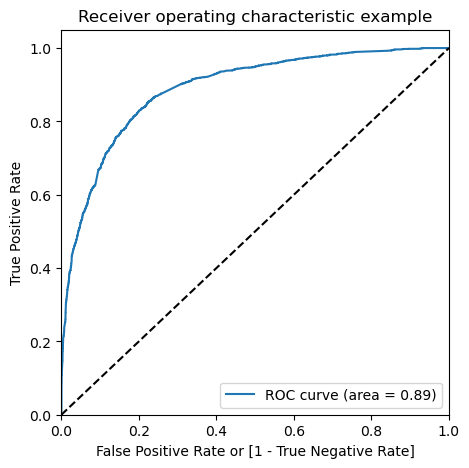

In [593]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [594]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.192847,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.143494,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.246066,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.879901,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.736362,7987,1,1,1,1,1,1,1,1,1,0,0


In [595]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.602110  0.973017  0.369782
0.2   0.2  0.759408  0.913737  0.662740
0.3   0.3  0.805857  0.850368  0.777977
0.4   0.4  0.814675  0.781276  0.835595
0.5   0.5  0.818139  0.711774  0.884763
0.6   0.6  0.802393  0.606705  0.924968
0.7   0.7  0.787278  0.529845  0.948528
0.8   0.8  0.767123  0.441946  0.970807
0.9   0.9  0.726500  0.309894  0.987452


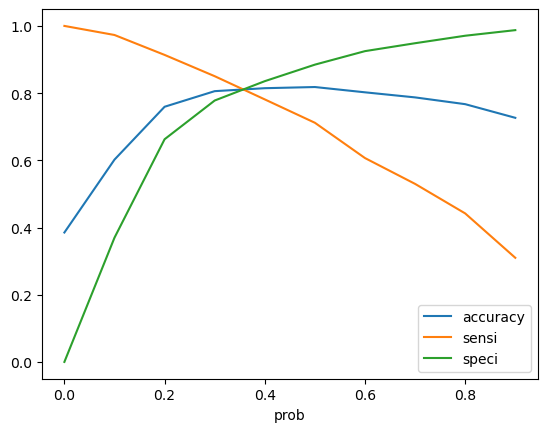

In [596]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [597]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.192847,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.143494,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.246066,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.879901,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.736362,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [598]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.192847,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.143494,1012,0,1,1,0,0,0,0,0,0,0,0,0,14
2,0,0.246066,9226,0,1,1,1,0,0,0,0,0,0,0,0,25
3,1,0.879901,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.736362,7987,1,1,1,1,1,1,1,1,1,0,0,1,74


In [599]:
#Model Evaluation
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8110533774208786


In [600]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3132,  773],
       [ 427, 2019]], dtype=int64)

In [601]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [602]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8254292722812756


In [603]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8020486555697823


In [604]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.19795134443021767


In [605]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7231375358166189


In [606]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8800224782242203


In [607]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3455,  450],
       [ 705, 1741]], dtype=int64)

In [608]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7946143313555454


In [609]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7117743254292723


In [610]:
from sklearn.metrics import precision_score, recall_score

In [611]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7946143313555454


In [612]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.7117743254292723


In [613]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [614]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

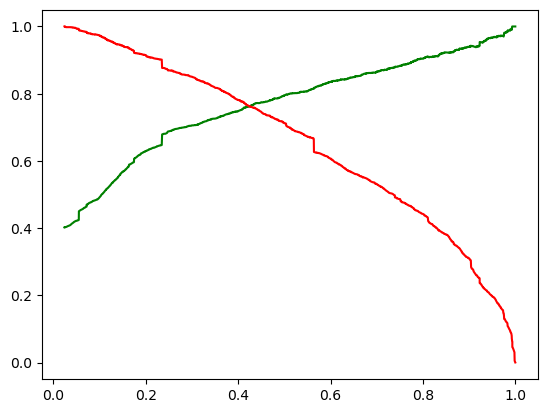

In [615]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [616]:
#Scaling the test data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [617]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,...,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0,-0.600595,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1490,0,0,1.887326,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7936,0,0,-0.752879,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4216,0,0,-0.888650,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3830,0,0,-0.587751,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [618]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.126088
1490    0.968507
7936    0.108756
4216    0.866217
3830    0.129897
1800    0.628486
6507    0.369732
4821    0.298090
4223    0.922821
4714    0.246066
dtype: float64

In [619]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [620]:
# Let's see the head
y_pred_1.head()

,0
3271,0.126088
1490,0.968507
7936,0.108756
4216,0.866217
3830,0.129897


In [621]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [622]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [623]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [624]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [625]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.126088
1,1,1490,0.968507
2,0,7936,0.108756
3,1,4216,0.866217
4,0,3830,0.129897


In [626]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [627]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [628]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.126088
1,1490,1,0.968507
2,7936,0,0.108756
3,4216,1,0.866217
4,3830,0,0.129897


In [629]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [630]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.126088,0
1,1490,1,0.968507,1
2,7936,0,0.108756,0
3,4216,1,0.866217,1
4,3830,0,0.129897,0


In [631]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1385,  349],
       [ 191,  798]], dtype=int64)

In [632]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [633]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8068756319514662


In [634]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7987312572087658


In [635]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.126088,0,13
1,1490,1,0.968507,1,97
2,7936,0,0.108756,0,11
3,4216,1,0.866217,1,87
4,3830,0,0.129897,0,13


In [636]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.968507,1,97
3,4216,1,0.866217,1,87
8,4223,1,0.922821,1,92
16,1946,1,0.930766,1,93
21,2461,1,0.993576,1,99
...,...,...,...,...,...
2694,1566,1,0.946698,1,95
2699,6461,1,0.965536,1,97
2703,5741,1,0.918594,1,92
2715,6299,1,0.884533,1,88


In [637]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4216, 4223, 1946, 2461, 5822, 2684, 2010, 4062, 7696, 9049,
       1518, 4543, 4830, 4365, 3542, 2504, 7674, 8596, 4003, 4963, 6947,
       4807,  446, 8372, 5805, 3758, 1561,  737, 9034, 6423, 8286, 7174,
       4461, 1436, 7552, 3932, 4080, 1475, 5785, 2860, 7253, 4297, 5490,
       1995, 6532, 4498, 5797, 8687,  831, 7653, 4149, 2018, 6743, 3307,
       3976, 5769, 1051, 1663, 3288, 8959, 7521, 8282, 8213, 9063, 5292,
       6913, 6015, 1481,  785, 3265, 3285, 7433, 3858, 3810, 2009, 8106,
        373, 3055, 7417, 4179, 8568, 7268, 4353, 6784, 6754, 7236, 2960,
       7753, 3983,  802, 8745, 4717,  505, 8509, 6094, 4992, 7036, 2680,
       7065,  112, 6149, 7157, 3827, 7175, 1675, 6999, 5826, 8492, 6499,
       2481, 3439, 4612, 7129, 4793, 1557, 4837, 2495,  822, 2378, 5090,
       5075, 7699, 5638, 2342, 8077, 2727,  720, 7489, 2961, 1542, 5656,
       2630, 6728, 8205, 6332, 8461, 2427, 5087,  174, 2674, 8065, 2095,
       1568, 8597, 4865, 3535, 4708, 1304, 6066, 65

In [638]:
res.params.sort_values(ascending=False)

Do Not Call                                             20.546515
Lead Source_Welingak Website                             5.855007
Lead Source_Reference                                    3.295021
What is your current occupation_Working Professional     2.605206
Last Activity_Other_Activity                             2.098283
Last Activity_SMS Sent                                   1.100830
const                                                    1.100730
Total Time Spent on Website                              1.100024
Lead Source_Olark Chat                                   1.070087
Last Activity_Email Opened                               0.665729
Last Activity_Email Link Clicked                         0.446511
Last Activity_Unreachable                                0.323210
Last Notable Activity_Unsubscribed                       0.201656
Specialization_Hospitality Management                   -0.437790
City_Tier II Cities                                     -0.580546
Last Activ